In [1]:
#!pip install openpyxl

### Loading Data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

# Folder path
path =  '../data/'

# Which values are considered NaN
na_vls = ['#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', 
               '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 
                'null', '...']


df_advrt = pd.read_excel(path+"data_analyst_data.xlsx", engine = "openpyxl")

# Transforming 'data' column in a Pandas datetype time series
df_advrt['Date (UTC)']  = pd.to_datetime(df_advrt['Date (UTC)'], dayfirst=True)
df_advrt['Day']  = pd.to_datetime(df_advrt['Date (UTC)'], dayfirst=True).dt.strftime('%d')


df_advrt.CTR = df_advrt.Clicks/df_advrt.Imps*100
df_advrt.CPC = df_advrt['Cost (BRL)']/df_advrt.Clicks
df_advrt.CR = df_advrt['Total number of conversions']/df_advrt.Clicks
df_advrt.ROAS = df_advrt['RTB Conversions value (BRL)']/df_advrt['Cost (BRL)']
df_advrt.Share = df_advrt['RTB Conversions']/df_advrt['Total number of conversions']*100
df_advrt

,Date (UTC),Imps,Clicks,CTR,Cost (BRL),CPC,RTB Conversions,CR,ROAS,RTB Conversions value (BRL),Total number of conversions,Share,Total number of tags,Day
0,2018-11-30,1399236,11315,0.808656,10805.77000,0.954995,651,1.845250,8.946154,96670.08,20879,3.117965,4718136,30
1,2018-11-29,6061558,41572,0.685830,53478.21298,1.286400,1511,0.683994,3.858447,206342.85,28435,5.313874,6282008,29
2,2018-11-28,6415389,41490,0.646726,57525.13985,1.386482,1346,0.745818,3.136187,180409.58,30944,4.349793,7259793,28
3,2018-11-27,6613383,44107,0.666936,71001.39354,1.609753,1560,0.761172,2.885414,204868.43,33573,4.646591,7859916,27
4,2018-11-26,4885912,32586,0.666938,49225.12170,1.510622,1127,1.001872,2.871994,141374.24,32647,3.452078,8336409,26
5,2018-11-25,3600215,26648,0.740178,42901.49122,1.609933,932,1.547358,2.917083,125147.23,41234,2.260271,9073731,25
6,2018-11-24,4896649,31899,0.651446,57188.01901,1.792784,1213,1.571805,2.969065,169794.96,50139,2.419274,9992109,24
7,2018-11-23,5704813,36649,0.642422,84763.78003,2.312854,1715,1.636880,3.040398,257715.64,59990,2.858810,12771679,23
8,2018-11-22,3810006,27052,0.710025,62036.72657,2.293240,1217,1.149823,2.882665,178831.13,31105,3.912554,7651396,22
9,2018-11-21,876204,6677,0.762037,7117.18126,1.065925,117,0.597274,3.217848,22902.01,3988,2.933801,2588215,21


In [3]:
# Renaming some of the columns to simplify the labels
df = df_advrt.rename({'Date (UTC)':'Date',
                    'Cost (BRL)': 'Cost',
                    'RTB Conversions':'RTBCon',	
                    'RTB Conversions value (BRL)':'RTBConValue',
                    'Total number of conversions': 'TNC',
                    'Total number of tags':'TNT'},
                    axis=1)
df.sort_values(by='Day', inplace=True) 
df.set_index('Date', inplace = True)
df

,Imps,Clicks,CTR,Cost,CPC,RTBCon,CR,ROAS,RTBConValue,TNC,Share,TNT,Day
Date,,,,,,,,,,,,,
2018-11-01,1010370,10255,1.014975,7591.92856,0.740315,249,1.117699,4.475919,33980.86,11462,2.172396,4147263,01
2018-11-02,1706892,18879,1.106045,13605.77442,0.720683,438,0.703215,4.412847,60040.20,13276,3.299187,4032548,02
2018-11-03,1771358,18545,1.046937,12538.01366,0.676086,347,0.688865,4.408406,55272.66,12775,2.716243,3749371,03
2018-11-04,824614,9475,1.149022,7484.59396,0.789931,206,1.179525,4.199866,31434.29,11176,1.843236,3371679,04
2018-11-05,1590375,13544,0.851623,10282.32786,0.759180,157,0.790608,4.561719,46905.09,10708,1.466194,4676418,05
2018-11-06,1334217,10588,0.793574,9028.10930,0.852674,166,0.566490,4.595088,41484.96,5998,2.767589,3206722,06
2018-11-07,960807,8096,0.842625,5652.77248,0.698218,131,0.563488,4.528574,25599.00,4562,2.871548,2677549,07
2018-11-08,1131060,10572,0.934698,12358.68682,1.169002,302,0.756148,4.237522,52370.21,7994,3.777833,3124552,08
2018-11-09,4552964,33232,0.729898,41488.70826,1.248457,881,0.561026,2.842497,117931.52,18644,4.725381,5056474,09


### Analysis 

First, let's look to the Clicks vs Conversions Behavior

C:\Users\luiza\AppData\Local\Temp\ipykernel_1444\2892450373.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels = df.Day, fontsize=8)
C:\Users\luiza\AppData\Local\Temp\ipykernel_1444\2892450373.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels = df.Day, fontsize=8)


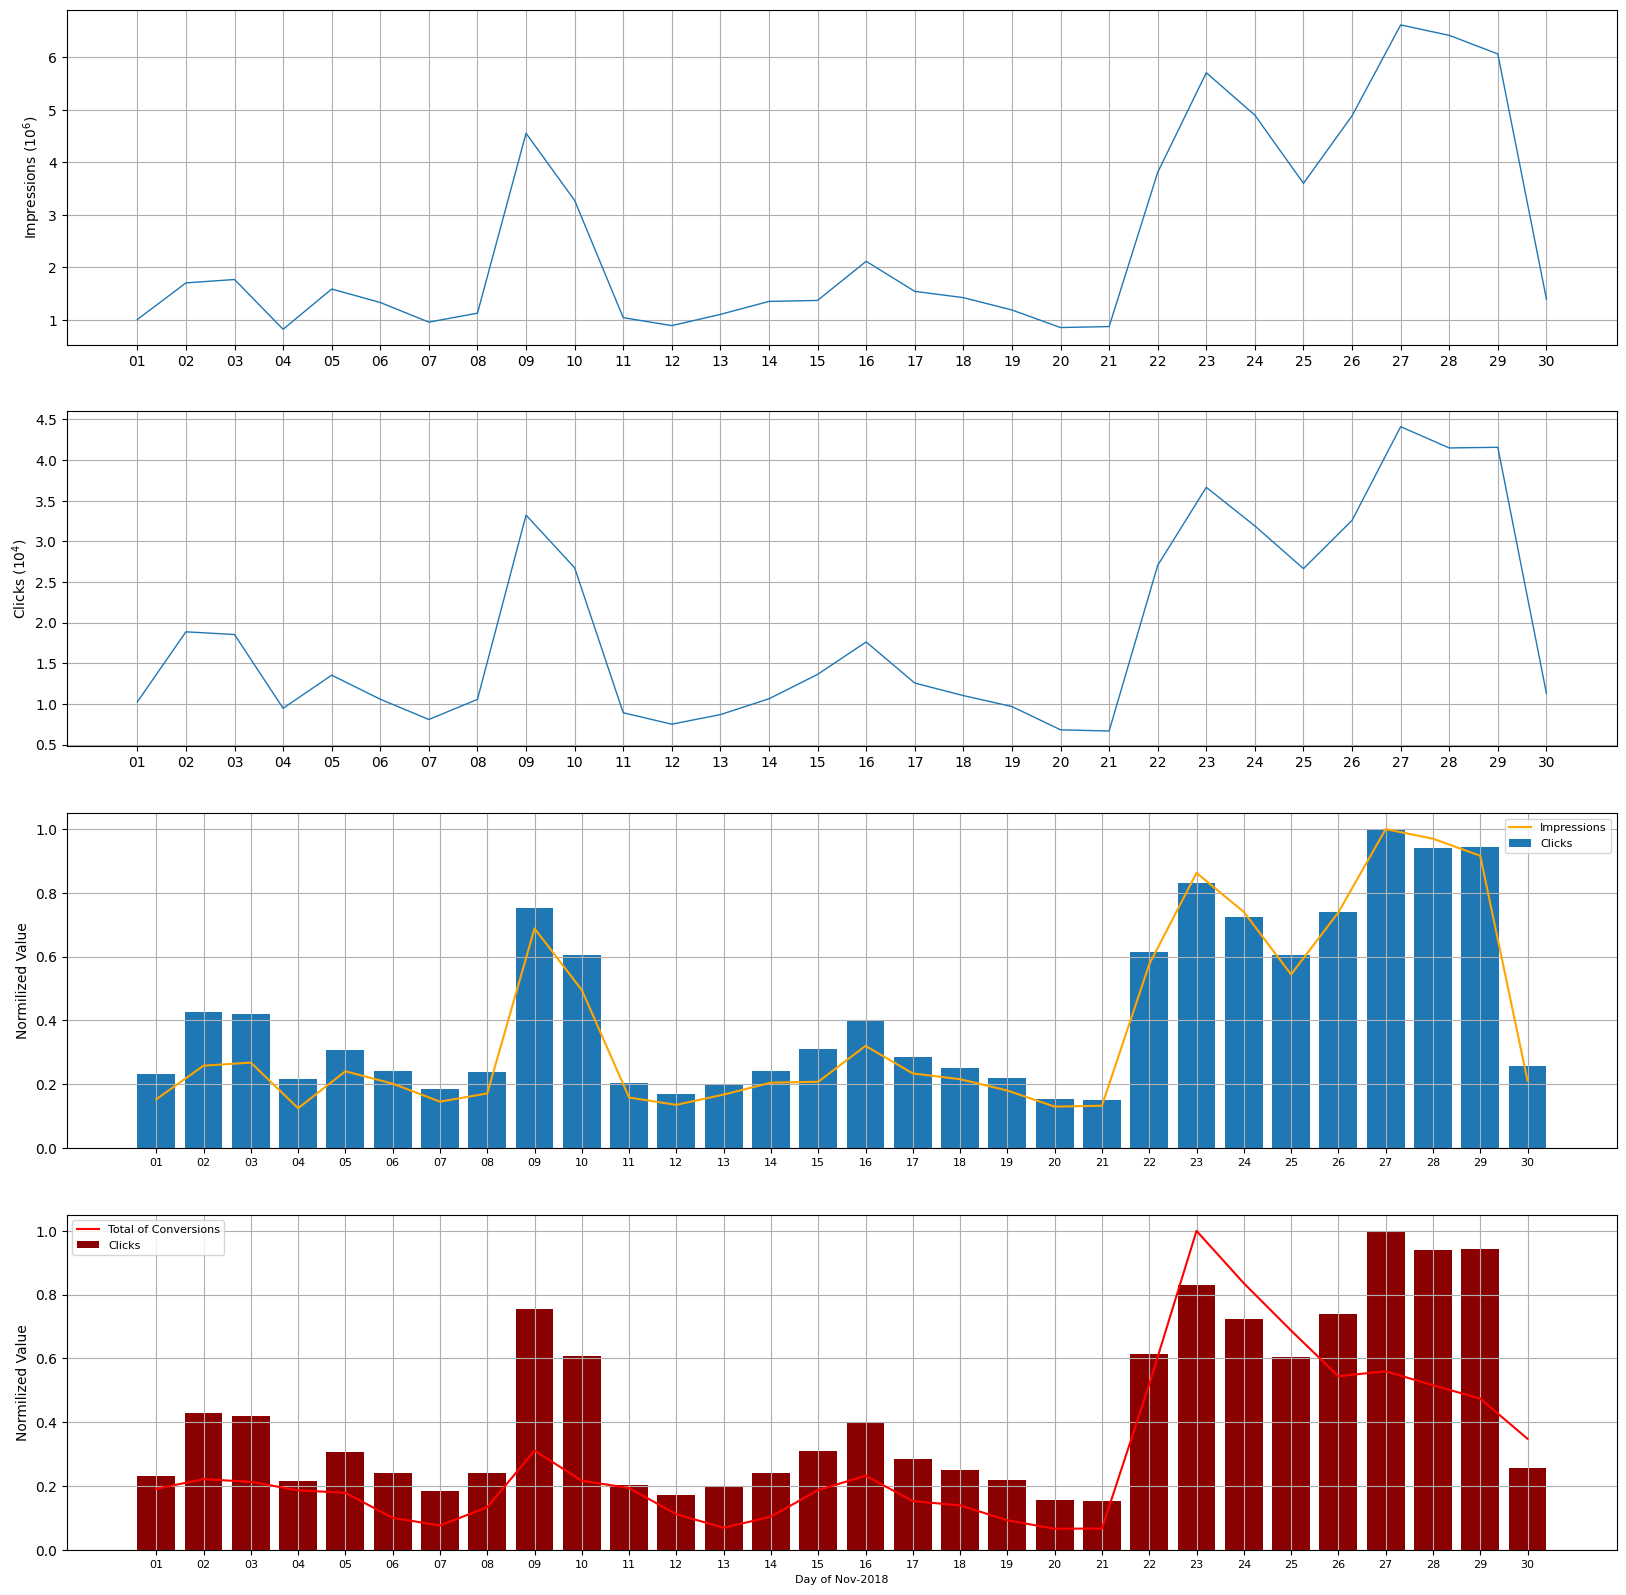

Correlation between impressions and clicks: 0.989

Correlation between clicks and conversions: 0.805



In [4]:
# Create Analysis plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))

# Plot the time series data
ax1.plot(df.Day, df.Imps/1e6, label='Time Series Data',  linewidth=1)
ax1.set_ylabel('Impressions ($10^6$)')
ax1.grid()

ax2.plot(df.Day, df.Clicks/1e4,  linewidth=1)
ax2.set_ylabel('Clicks ($10^4$)')
ax2.grid()

# Plot the relative behavior: Impressions vs Clicks
ax3.plot(df.Day, df.Imps/df.Imps.max(), label='Impressions',  linewidth=1.5, color = 'orange')
ax3.bar(df.Day, df.Clicks/df.Clicks.max(), label='Clicks')
ax3.grid()
ax3.set_ylabel('Normilized Value')
ax3.set_xticklabels(labels = df.Day, fontsize=8)
ax3.legend(fontsize=8)

# Plot the relative behavior: Total Number of Conversions vs Clicks
ax4.plot(df.Day, df.TNC/df.TNC.max(), label='Total of Conversions',  linewidth=1.5, color = 'red')
ax4.bar(df.Day, df.Clicks/df.Clicks.max(), label='Clicks', color = 'darkred')
ax4.grid()
ax4.set_xlabel('Day of Nov-2018',fontsize=8)
ax4.set_ylabel('Normilized Value')
ax4.set_xticklabels(labels = df.Day, fontsize=8)
ax4.legend(fontsize=8)

plt.show()

print(f'Correlation between impressions and clicks: {df.Imps.corr(df.Clicks).round(3)}\n')
print(f'Correlation between clicks and conversions: {df.TNC.corr(df.Clicks).round(3)}\n')

There's a strong correlation between the number of impressions and clicks and a not so strong correlarion between clicks and total conversions, specially if we observe the last 5 days of the month. Let's see another variables behavior: 

Another metrics

* CPC
* Total number of conversions
* RTB’s share of the website
* Overall traffic of the advertiser

C:\Users\luiza\AppData\Local\Temp\ipykernel_1444\3424150967.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels = df.Day,fontsize=8)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\luiza\AppData\Local\Temp\ipykernel_1444\3424150967.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels = df.Day,fontsize=8)
C:\Users\luiza\AppData\Local\Temp\ipykernel_1444\3424150967.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(labels = df.Day,fontsize=8)


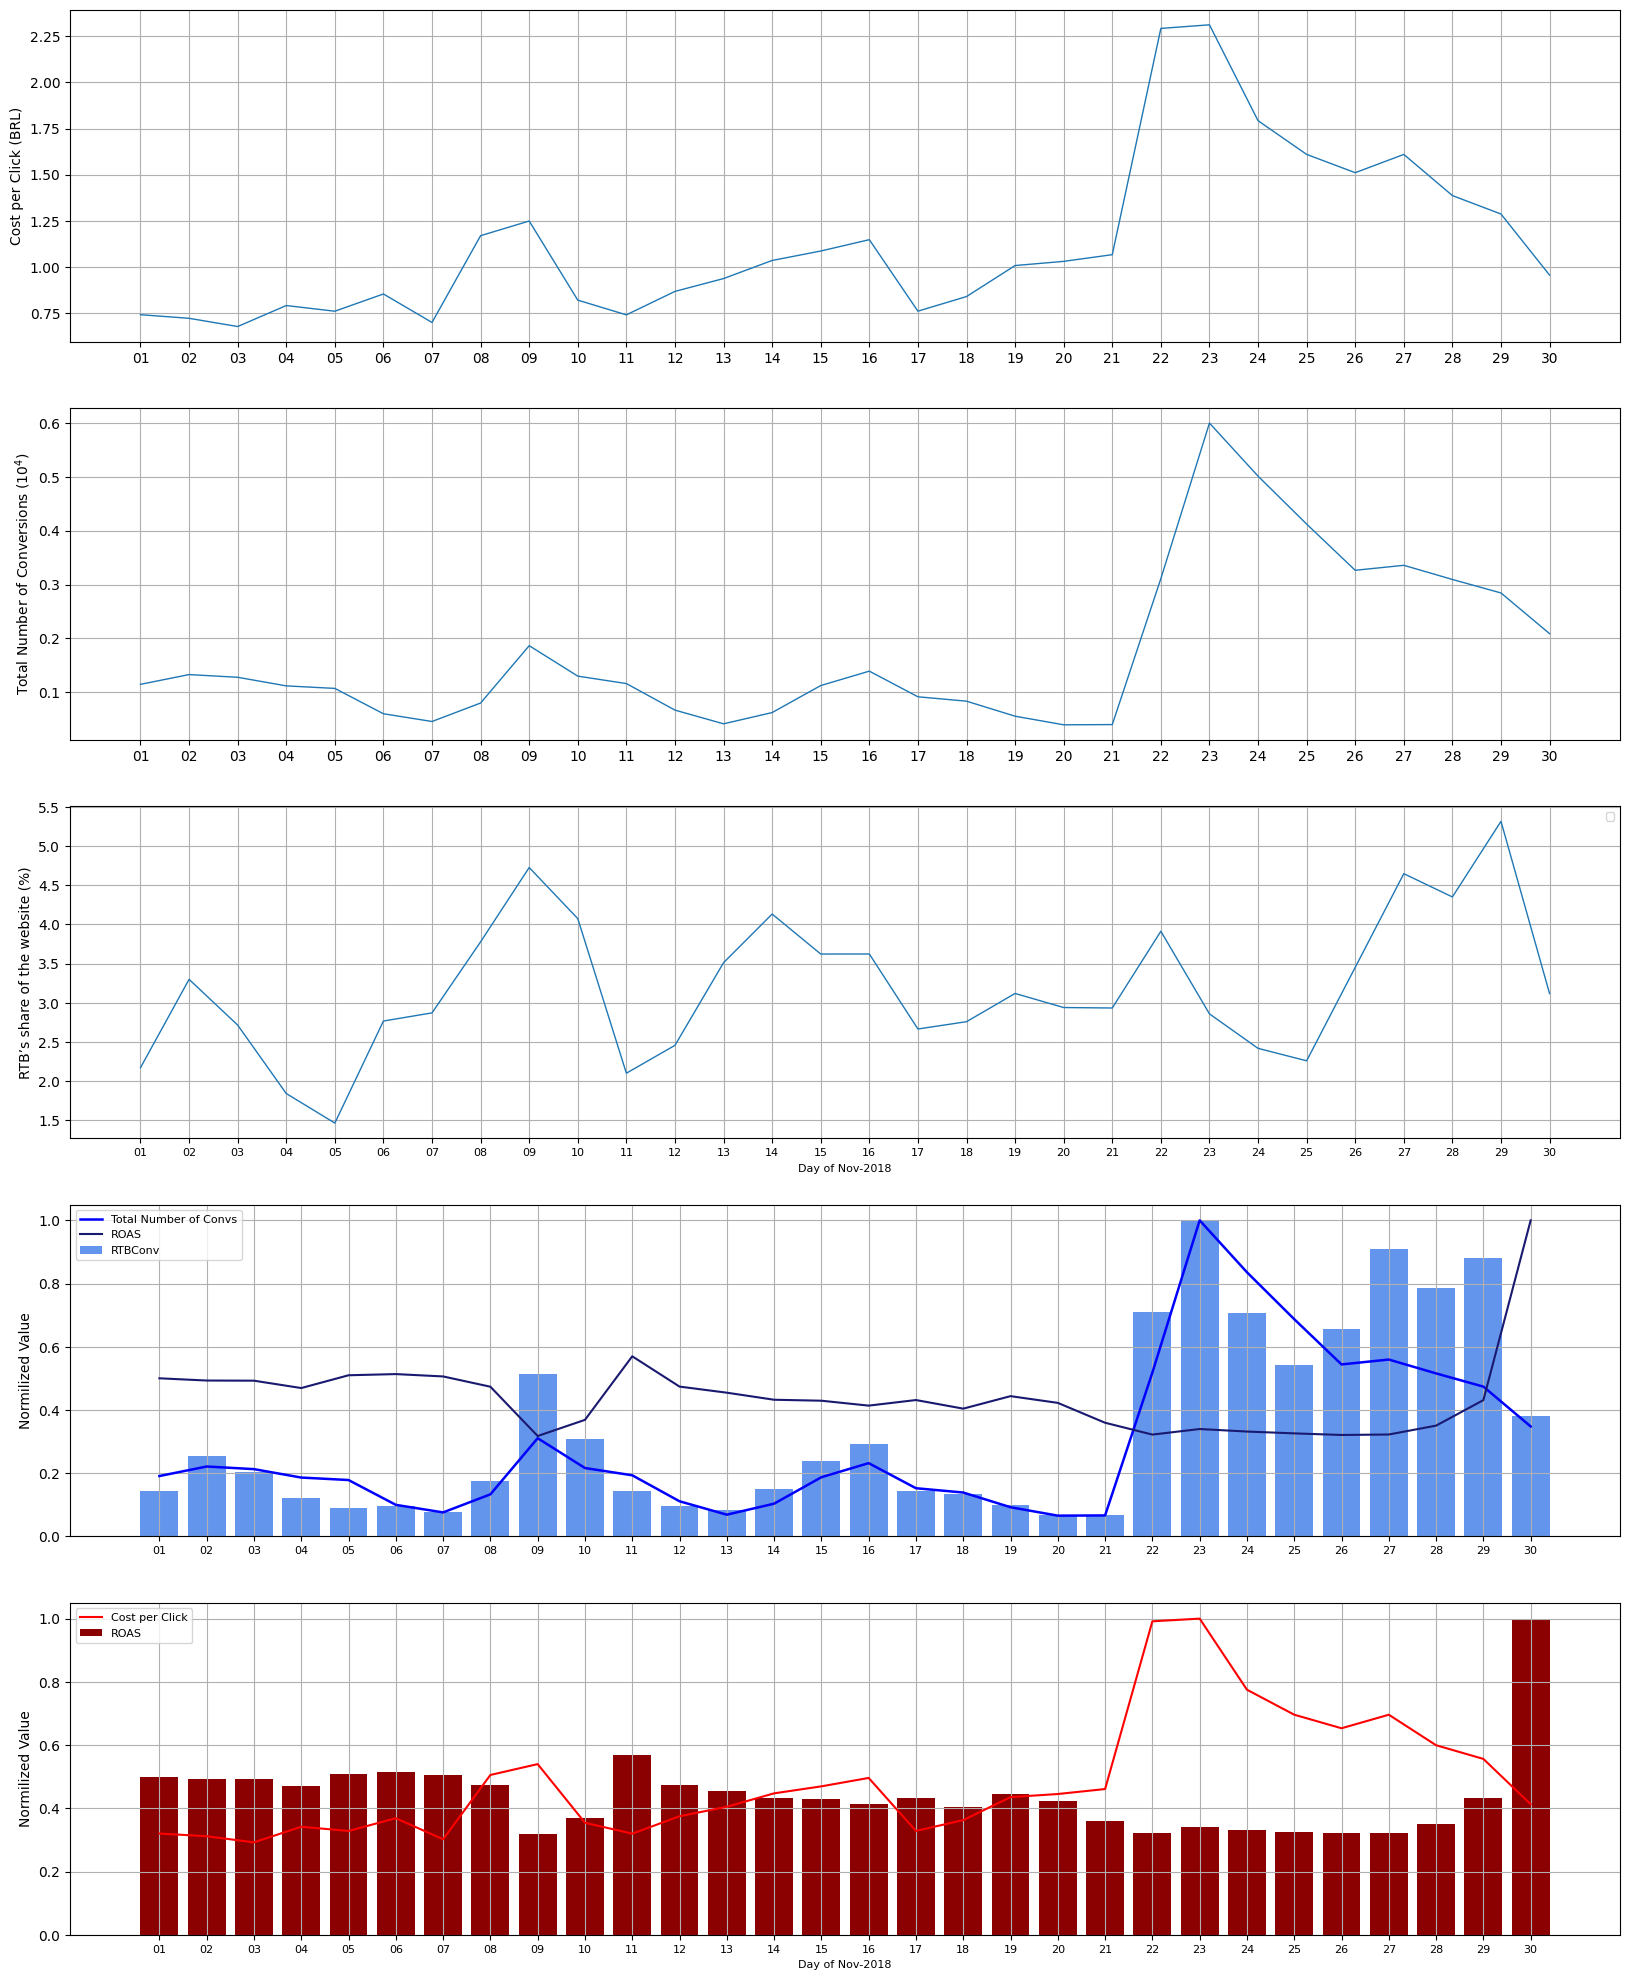

In [5]:
# Create Analysis plots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(20, 25))

# Plot the time series data

# Cost per Click time series
ax1.plot(df.Day, df.CPC,  linewidth=1)
ax1.set_ylabel('Cost per Click (BRL)')
ax1.grid()

# Total of conversions time series
ax2.plot(df.Day, df.TNC/10e4,  linewidth=1)
ax2.set_ylabel('Total Number of Conversions ($10^4$)')
ax2.grid()

# RTB share time series
ax3.plot(df.Day, df.Share,  linewidth=1)
ax3.set_ylabel('RTB’s share of the website (%)')
ax3.set_xlabel('Day of Nov-2018',fontsize=8)
ax3.set_xticklabels(labels = df.Day,fontsize=8)
ax3.legend(fontsize=8)
ax3.grid()

# Total conversions vs RTB Conversions vs ROAS
ax4.plot(df.Day, df.TNC/df.TNC.max(), label = 'Total Number of Convs' , linewidth=1.8, color = 'blue')
ax4.bar(df.Day, df.RTBCon/df.RTBCon.max(), label = 'RTBConv' , linewidth=1.8, color='cornflowerblue')
ax4.plot(df.Day, df.ROAS/df.ROAS.max(), label = 'ROAS',  color = 'midnightblue')
ax4.set_ylabel('Normilized Value')
ax4.set_xticklabels(labels = df.Day,fontsize=8)
ax4.legend(fontsize=8)
ax4.grid()

# Cost per Click vs ROAS
ax5.plot(df.Day, df.CPC/df.CPC.max(), label = 'Cost per Click' , linewidth=1.5, color='red')
ax5.bar(df.Day, df.ROAS/df.ROAS.max(), label = 'ROAS' , color='darkred')
ax5.set_ylabel('Normilized Value')
ax5.set_xlabel('Day of Nov-2018',fontsize=8)
ax5.set_xticklabels(labels = df.Day,fontsize=8)
ax5.legend(fontsize=8)
ax5.grid()

plt.show()

Some considerations: 
1. The 1st and 2nd figures seem to show some correlation between CPC and Total number of Conversions. Both time series reach peaks and low points, apparently, at the same time. Let us verify that by calculating its correlation coefficient:


In [6]:
print(f'Correlation between Cost per Click and Total Number of Conversions: {df.TNC.corr(df.CPC).round(3)}\n')

Correlation between Cost per Click and Total Number of Conversions: 0.843



In fact, there is some correlation, but not as strong as expected, by observing the figures. 
Now, we focus on RTB Conversions influence over the return, given by ROAS. 

2. Third chart seems to show some seasonality, to be verified;
3. Fourth chart shows, intuitivelly, that RTB Conversions seems to influence the Total Number of Conversions, at least along the 25 first days of the month. At that point, the variables seem to behave in an inversely proportional shape.
4. Forth figure also shows what it seems to be an inversely proportional behavior between Total Number of Conversions and ROAS.

In [7]:
print(f'Correlation between RTB Conversions and Total Number of Conversions: {df.RTBCon.corr(df.TNC).round(3)}\n')
print(f'Correlation between Total Number of Conversions and ROAS: {df.TNC.corr(df.ROAS).round(3)}\n')
print(f'Correlation between RTB Conversions and ROAS: {df.RTBCon.corr(df.ROAS).round(3)}\n')

Correlation between RTB Conversions and Total Number of Conversions: 0.907

Correlation between Total Number of Conversions and ROAS: -0.333

Correlation between RTB Conversions and ROAS: -0.372



The numbers confirm the inverse correlations we mentioned before. Also, there's a reinforcement of the suspected correlation between RTB Conversions and Total Number of Conversions, though the last five days show a different behavior.

5. At last, the final chart shows the obvous relationship between CPC and ROAS, as the more you spend per click, the less “efficient” this investment is.

Now let's explore statsmodels tools for seasonality decomposing:

1. To check RTB Conversions seasonality

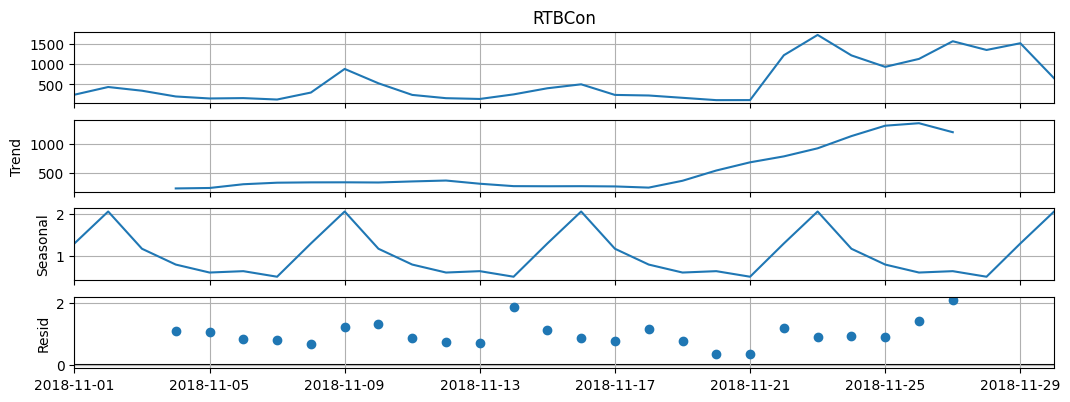

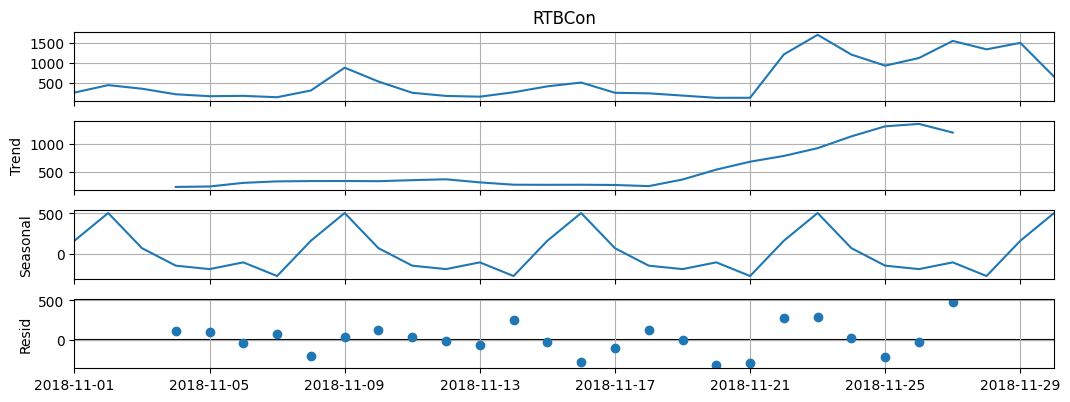

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

RTB_analysis = df.RTBCon.copy()

decompose_result_mult = seasonal_decompose(RTB_analysis, model="multiplicative")
decompose_result_add = seasonal_decompose(RTB_analysis, model="aditive")

# Supose a multiplicative seasonal component
fig1 = decompose_result_mult.plot()
ax1 = fig1.get_axes()
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
ax1[3].grid()
fig1.set_size_inches(12, 4)
plt.show()

# Supose an aditive seasonal component
fig2 = decompose_result_add.plot()
ax2 = fig2.get_axes()
ax2[0].grid()
ax2[1].grid()
ax2[2].grid()
ax2[3].grid()
fig2.set_size_inches(12, 4)

plt.show()

2. To check Clicks seasonality
3. To check Impressions seasonality

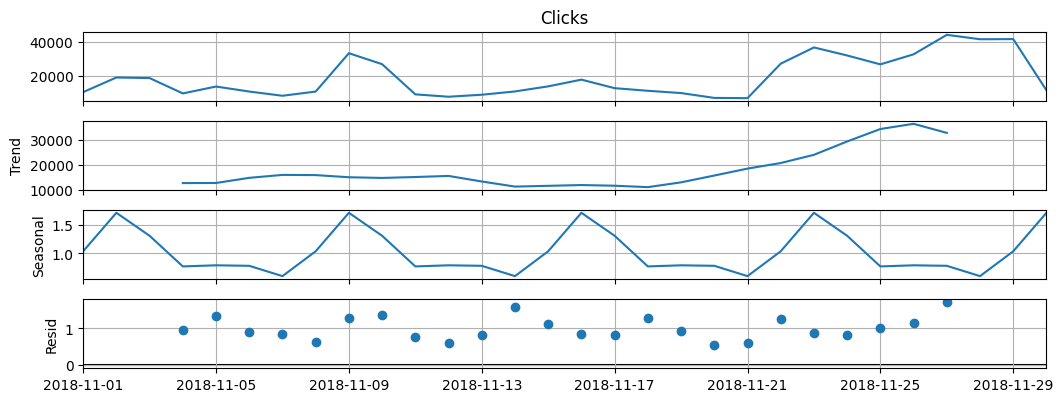

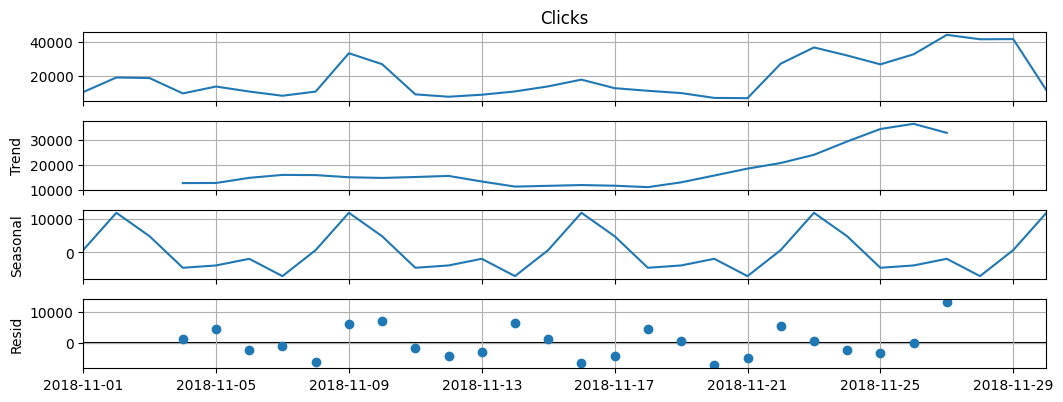

In [9]:
# Looking for the Clicks behavior

Clicks_analysis = df.Clicks.copy()

Clicks_decompose_result_mult = seasonal_decompose(Clicks_analysis, model="multiplicative")
Clicks_decompose_result_add = seasonal_decompose(Clicks_analysis, model="aditive")

# Supose a multiplicative seasonal component
fig1 = Clicks_decompose_result_mult.plot()
ax1 = fig1.get_axes()
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
ax1[3].grid()
fig1.set_size_inches(12, 4)
plt.show()

# Supose an aditive seasonal component
fig2 = Clicks_decompose_result_add.plot()
ax2 = fig2.get_axes()
ax2[0].grid()
ax2[1].grid()
ax2[2].grid()
ax2[3].grid()
fig2.set_size_inches(12, 4)

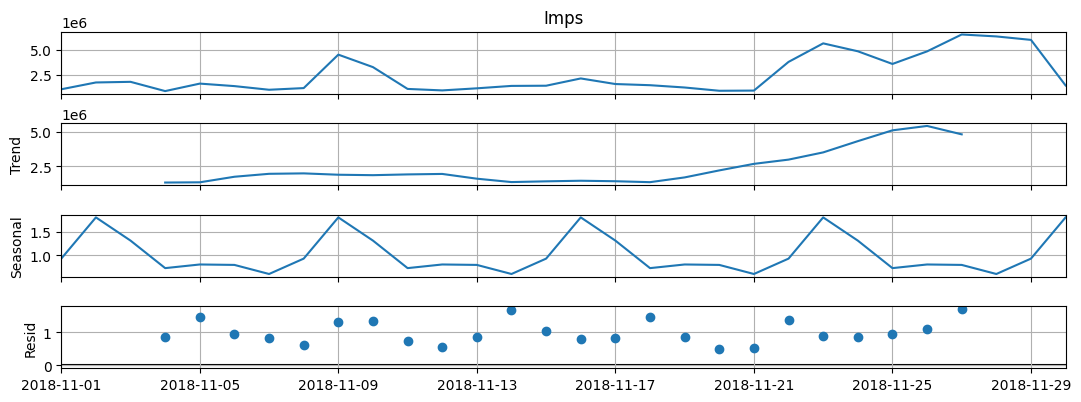

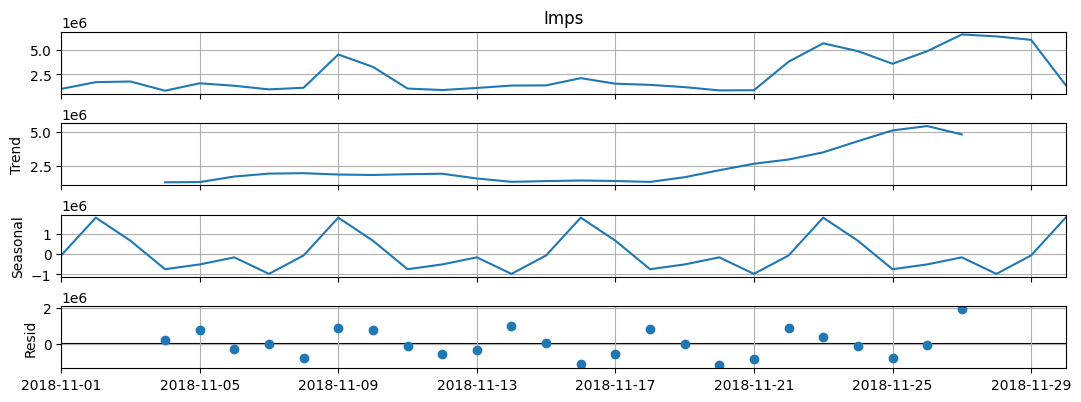

In [10]:
# Looking for the Impressions behavior

Imps_analysis = df.Imps.copy()

Imps_decompose_result_mult = seasonal_decompose(Imps_analysis, model="multiplicative")
Imps_decompose_result_add = seasonal_decompose(Imps_analysis, model="aditive")

# Supose a multiplicative seasonal component
fig1 = Imps_decompose_result_mult.plot()
ax1 = fig1.get_axes()
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
ax1[3].grid()
fig1.set_size_inches(12, 4)
plt.show()

# Supose an aditive seasonal component
fig2 = Imps_decompose_result_add.plot()
ax2 = fig2.get_axes()
ax2[0].grid()
ax2[1].grid()
ax2[2].grid()
ax2[3].grid()
fig2.set_size_inches(12, 4)

All three seasonality analisys show some pattern that repeats itself from week to week. But we must pay attention to the trend presented at the final five days of the month and also to the meaningful residual component. Some future analysis may be necessary to interpret those factors.

### Future improvements and analysis

1. Analyze residual components and deeply investigate the decomposition of seasonality;
2. Look for a model capable of some forecasting: SARIMAX or ARIMA seem like good options;
3. To train a linear regression model, using clicks, impressions, costs, and so on, as features and ROAS, conversion numbers, or similar variables as targets. It will probably be necessary to use some improvements to this model, perhaps using Ridge or Lasso as options.